Here I import all wee need 

In [150]:
import numpy as np
from glob import glob
import pickle
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pickle
from scipy.signal import butter, lfilter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import random
import os
import math
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import normalize
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

preprocessing

In [108]:
cs = ['F' , 'N' , 'O' , 'S' , 'Z']
x = []
y = []

for ind in range(len(cs)):
    data_dir = './data/' + cs[ind] + '/*.txt'
    all_f = glob(data_dir)
    if(len(all_f) == 0):
        data_dir = './data/' + cs[ind] + '/*.TXT'
        all_f = glob(data_dir)
    #print(all_f)
    for f in all_f:
        a = open(f,'r')
        data = [float(i) for i in a.readlines()]
        x.append(data)
        y.append(ind)
        # print(data)
        # print(len(data))

x = np.array(x)
y = np.array(y)
print(x.shape)

(500, 4097)


In [109]:
pickle.dump(x, open('x.pkl' , 'wb'))
pickle.dump(y, open('y.pkl' , 'wb'))

filter

In [110]:
seed = 57

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

x_normal = np.concatenate((x[:300], x[400:]), axis=0)
x_seizure = x[300:400]
#print(x_normal.shape)
#print(x_seizure.shape)
sampling_freq = 173.6 #based on info from website

b, a = butter(3, [0.5,40], btype='bandpass',fs=sampling_freq)


x_normal_filtered = np.array([lfilter(b,a,x_normal[ind,:]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[ind,:]) for ind in range(x_seizure.shape[0])])
#print(x_normal.shape)
#print(x_seizure.shape)


x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

x = np.concatenate((x_normal,x_seizure))
y = np.concatenate((np.zeros((400,1)),np.ones((100,1))))

Here I extract 15 features which are time domain or frequency domain features. then I plot each of them for better visualization.


In [170]:
#time domain features
median = np.median(x, axis=1)#median
max = np.max(x, axis=1)#max
min=np.min(x, axis=1)#min
var=np.var(x,axis=1)#variance
power=np.mean(x**2,axis=1)#power
peak=np.max(np.abs(x),axis=1)#peak
p2p=np.ptp(x,axis=1)#peaktopeak
crestFactor=np.max((np.abs(x))/np.sqrt(np.mean(x**2)),axis=1)#crestfactor
mean=np.mean(x,axis=1)#mean
std=np.std(x,axis=1)#standard deviation
pulseIndicator=np.max((np.abs(x)/np.mean(x)),axis=1)#pulse indicator


fft or fast Fourier transform .It converts a signal into individual spectral components and thereby provides frequency information about the signal

In [171]:
#frecuncy-domain
ft = fft(x)
S = np.abs(ft**2)/len(x)
max_f=np.max(S,axis=1)
sum_f=np.sum(S,axis=1)
mean_f=np.mean(S,axis=1)
var_f=np.var(S,axis=1)
peak_f=np.max(np.abs(S),axis=1)


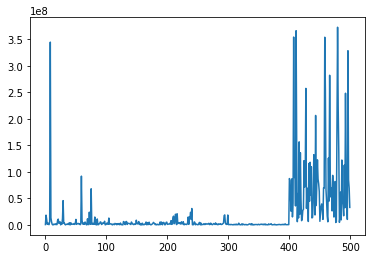

In [113]:
plt.plot(peak_f)

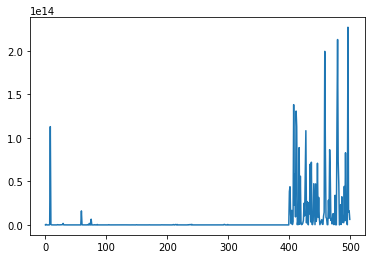

In [114]:
plt.plot(var_f)

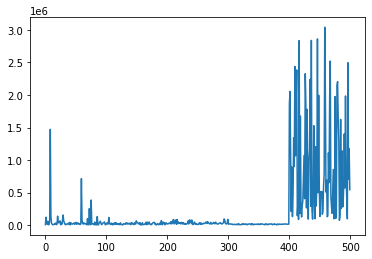

In [115]:
plt.plot(mean_f)

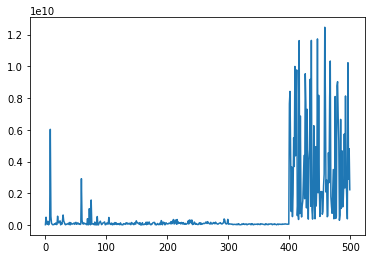

In [116]:
plt.plot(sum_f)

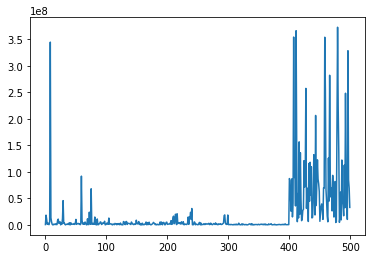

In [117]:
plt.plot(max_f)

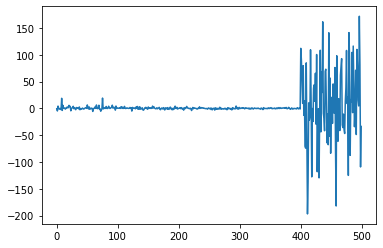

In [118]:
plt.plot(median)

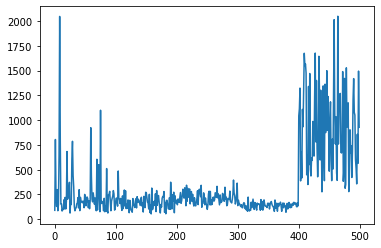

In [119]:
plt.plot(max)

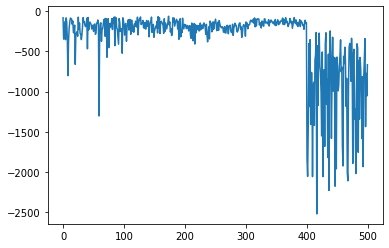

In [120]:
plt.plot(min)

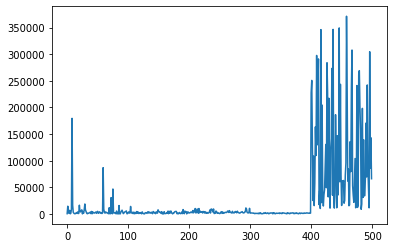

In [121]:
plt.plot(var)

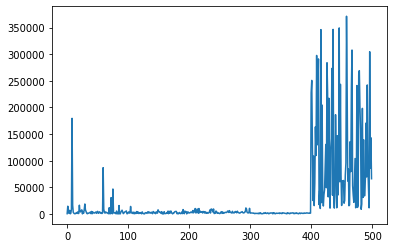

In [122]:
plt.plot(power)

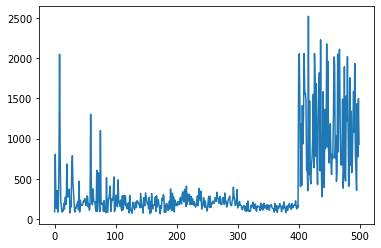

In [123]:
plt.plot(peak)

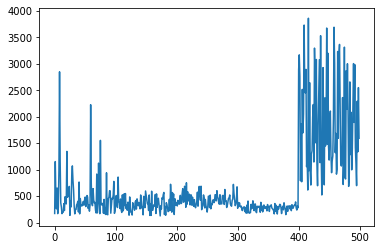

In [18]:
plt.plot(p2p)

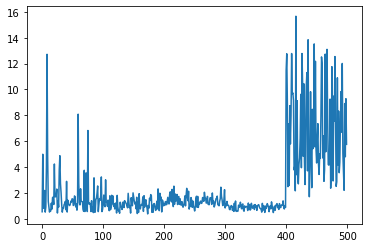

In [124]:
plt.plot(crestFactor)

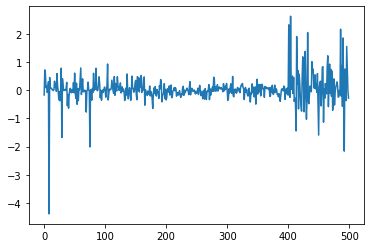

In [125]:
plt.plot(mean)

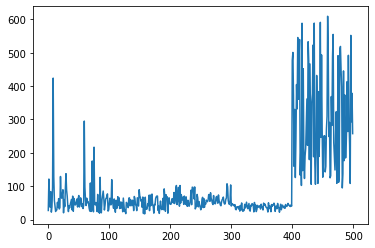

In [126]:
plt.plot(std)

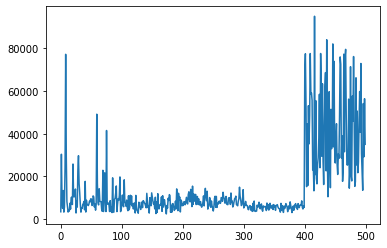

In [127]:
plt.plot(pulseIndicator)

ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it

In [162]:
y=y.ravel()

here I concatenate all the  features together,then I Make a df_features list that its  size is 500*15

In [172]:
df_features=np.concatenate((median.reshape(-1, 1), max.reshape(-1, 1),
    min.reshape(-1, 1),var.reshape(-1, 1), power.reshape(-1, 1),p2p.reshape(-1, 1),
    crestFactor.reshape(-1, 1),mean.reshape(-1,1),std.reshape(-1,1),pulseIndicator.reshape(-1,1),max_f.reshape(-1,1),
    sum_f.reshape(-1,1),mean_f.reshape(-1,1),var_f.reshape(-1,1),peak_f.reshape(-1,1)
                                   ),axis=1)
df_features.shape

(500, 15)

SVM MACHINE LEARNING ALGORITHM:
first of all, I run a grid search on our data to find the best parameters for this algorithm
parameters that I want to tune:

C=Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
KERNEL=Specifies the kernel type to be used in the algorithm


gridsesarch parametrs:
name of tha model
parametrs for tuning
refit=Refit an estimator using the best found parameters on the whole dataset
verbose>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

In [140]:
svmclassifier = SVC()
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear','rbf','sigmoid','poly'],
              'max_iter': [2000000]
              } 
grid = GridSearchCV(svmclassifier, param_grid, refit = True, verbose = 3)
grid.fit(df_features, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.6s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.3s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.5s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 3/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 4/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 5/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 1/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 2/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.870 total time=   0.0s
[CV 3/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.870 total time=   0.0s
[CV 4/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.860 total time=   0.0s
[CV 5/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 1/5] END C=0.1, kernel=poly, max_iter=2000000;, score=0.870 total time=

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.6s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.3s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.4s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 2/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 3/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.930 total time=   0.0s
[CV 4/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.930 total time=   0.0s
[CV 5/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 1/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 2/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 3/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 4/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 5/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 1/5] END C=1, kernel=poly, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 2/5] EN

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.6s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.3s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.5s


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s
[CV 5/5] END C=10, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 2/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.940 total time=   0.0s
[CV 3/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.960 total time=   0.0s
[CV 4/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.940 total time=   0.0s
[CV 5/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.960 total time=   0.0s
[CV 1/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 2/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 3/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 4/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 5/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[C

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'max_iter': [2000000]},
             verbose=3)

In [141]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=10, max_iter=2000000)
{'C': 10, 'kernel': 'rbf', 'max_iter': 2000000}


after finding hyper parameters, I built a SVM classifier with them 
also I  create a dictionary for scoring parameters.
With k fold functon I split the data to 5 folds,then  by applying the cross_validation function we can have the scoring results

In [142]:
svmclassifier = SVC(random_state=seed, kernel="rbf",C=10,max_iter=20000000)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=svmclassifier, X=df_features, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00200224, 0.00199914, 0.00200319, 0.00099897, 0.00200272]),
 'score_time': array([0.00299931, 0.00200152, 0.00299621, 0.00200033, 0.00300169]),
 'test_accuracy_score': array([0.92, 0.95, 0.97, 0.94, 0.94]),
 'test_recall': array([0.73076923, 0.72222222, 0.86956522, 0.71428571, 0.68421053]),
 'test_precision': array([0.95      , 1.        , 1.        , 0.83333333, 1.        ])}

to know witch algorithm is better i used the mean of recall score

In [143]:
np.array(results['test_recall']).mean()

0.7442105821968522

by using standardscaler i normalize the data and i fit the model with this data,we can see that mean of recall score approved.

In [144]:
std=StandardScaler()
df_features_normal=std.fit_transform(df_features)

In [145]:

svmclassifier = SVC(random_state=seed, kernel="rbf",C=10,max_iter=20000000)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=svmclassifier, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00301266, 0.00099969, 0.00200629, 0.00199914, 0.00099969]),
 'score_time': array([0.00299144, 0.00200701, 0.00200176, 0.00100017, 0.00199795]),
 'test_accuracy_score': array([0.97, 0.93, 0.99, 0.97, 0.96]),
 'test_recall': array([0.92307692, 0.77777778, 0.95652174, 0.85714286, 0.78947368]),
 'test_precision': array([0.96      , 0.82352941, 1.        , 0.92307692, 1.        ])}

RandomForestClassifier:
for finding hyper parametrs i used RandomizedSearchCV function
n_estimators:number of trees in the random forest
max_features:number of features in consideration at every split
max_depth:maximum number of levels allowed in each decision tree
min_samples_split:minimum sample number to split a node
min_samples_leaf: minimum sample number that can be stored in a leaf node
bootstrap:method used to sample data points

In [156]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [157]:
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=seed, n_jobs = -1)

In [164]:
rf_random.fit(df_features, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=57, verbose=2)

In [165]:
rf_random.best_params_

{'n_estimators': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

after finding hyper parametrs,we do exact work that we did for svm

In [166]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=60,random_state=seed,min_samples_leaf=1,max_features='auto',bootstrap=False)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)
}
kfold = KFold(n_splits=5 ,random_state=seed, shuffle=True)
results = cross_validate(estimator=rfc, X=df_features, y=y, cv=kfold, scoring=scoring )
results

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

{'fit_time': array([0.0079999 , 0.00500584, 0.00599527, 0.00600028, 0.00700188]),
 'score_time': array([0.00200915, 0.00200558, 0.00200248, 0.00200129, 0.00199962]),
 'test_accuracy_score': array([0.93, 0.95, 1.  , 0.93, 0.96]),
 'test_recall': array([0.80769231, 0.88888889, 1.        , 0.92857143, 0.94736842]),
 'test_precision': array([0.91304348, 0.84210526, 1.        , 0.68421053, 0.85714286])}

mean of recall score for randomforest

In [167]:
np.array(results['test_recall']).mean()

0.9145042092410515

ploting confusion matrix and roc_curve for best algorithm

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


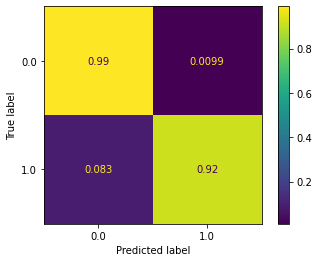

In [173]:
x_train, x_test, y_train, y_test = train_test_split(df_features, y, random_state=10, shuffle=True)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
plot_confusion_matrix(rfc,x_test, y_test, normalize="true")

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


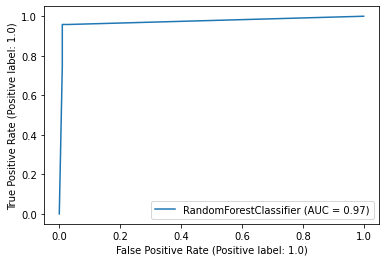

In [174]:
plot_roc_curve(rfc,x_test,y_test)

check df_features_normal for rfc

In [175]:
rfc = RandomForestClassifier(random_state=seed)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)
}
kfold = KFold(n_splits=5 ,random_state=seed, shuffle=True)
results = cross_validate(estimator=rfc, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.10802174, 0.12303209, 0.11011147, 0.10602403, 0.11803174]),
 'score_time': array([0.00900269, 0.00799608, 0.00700092, 0.00800157, 0.01000214]),
 'test_accuracy_score': array([0.97, 0.97, 1.  , 0.96, 0.97]),
 'test_recall': array([0.96153846, 0.94444444, 1.        , 0.92857143, 0.94736842]),
 'test_precision': array([0.92592593, 0.89473684, 1.        , 0.8125    , 0.9       ])}

KNN:
paremtrs for tuning:
n_neighbors:Number of neighbors to use by default for kneighbors queries.
weights:Weight function used in prediction
p=Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2

In [191]:
grid_params = { 'n_neighbors' : [2,4,6,8,10,12],
               'weights' : ['uniform','distance'],
               'p':[1,2]}
knn_2 = KNeighborsClassifier()
gs = GridSearchCV(knn_2, grid_params, verbose = 1, cv=3, n_jobs = -1)
gs.fit(df_features,y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [192]:
gs.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [193]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 4, p=1,weights='distance')
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=knn, X=df_features, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00257611, 0.00200176, 0.0019989 , 0.00199866, 0.00200152]),
 'score_time': array([0.00242305, 0.00300121, 0.00300074, 0.00200248, 0.00300074]),
 'test_accuracy_score': array([0.94, 0.97, 0.96, 0.93, 0.91]),
 'test_recall': array([0.84615385, 0.94444444, 0.91304348, 0.78571429, 0.89473684]),
 'test_precision': array([0.91666667, 0.89473684, 0.91304348, 0.73333333, 0.70833333])}

In [194]:
np.array(results['test_recall']).mean()

0.8768185793357418

In [195]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 29, p=1)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=knn, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00199676, 0.00200081, 0.00198579, 0.00300169, 0.00201035]),
 'score_time': array([0.00600529, 0.00601625, 0.00599957, 0.00700331, 0.00699306]),
 'test_accuracy_score': array([0.96, 0.94, 0.99, 0.96, 0.96]),
 'test_recall': array([0.88461538, 0.77777778, 0.95652174, 0.85714286, 0.84210526]),
 'test_precision': array([0.95833333, 0.875     , 1.        , 0.85714286, 0.94117647])}